# Data Analysis with Python

In [2]:
# 1. import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline


In [3]:
# 2.  Download stock price data, store in dataframe
msft = pdr.get_data_google('MSFT', start='2016-08-03')

In [5]:
# 3. Take a look at the data
msft.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-17,83.12,83.12,82.24,82.40,22078993
2017-11-20,82.40,82.59,82.25,82.53,16314978
2017-11-21,82.74,83.84,82.74,83.72,21237454
2017-11-22,83.83,83.90,83.04,83.11,20553089
2017-11-24,83.01,83.43,82.78,83.26,7425603


In [6]:
# 4. Get just the data we are interested in
msft_close = msft['Close']

In [6]:
# 5. Verify data 
type(amzn_close.head())

pandas.core.series.Series

In [7]:
# 6. Convert close-to-close dollar change into instantaneous rate of return, verify transformation
amzn_percent_change = np.log(amzn_close / amzn_close.shift(1)) * 100
amzn_percent_change.head()

Date
2016-08-03         NaN
2016-08-04    0.809026
2016-08-05    0.682498
2016-08-08    0.075691
2016-08-09    0.228032
Name: Close, dtype: float64

In [8]:
# 7. Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample
# Pandas also deals with missing values by ommitting them 
amzn_percent_change.describe()

count    252.000000
mean       0.106487
std        1.194826
min       -5.273753
25%       -0.484134
50%        0.117312
75%        0.811309
max        3.881057
Name: Close, dtype: float64

In [10]:
# 8. An alternative more comprehensive table of descriptives can be generated using scipy stats, assumes a sample
from scipy import stats
stats.describe(amzn_percent_change[1:])

DescribeResult(nobs=252, minmax=(-5.2737531271995062, 3.8810569610031007), mean=0.10648736829713538, variance=1.4276100656074371, skewness=-0.5610474712532317, kurtosis=2.3600263221846784)

In [12]:
# 9. for comparision generate random numbers that follow normal distribution
x = np.random.normal(.1064,1.1948, 252)
stats.describe(x)

DescribeResult(nobs=252, minmax=(-3.530203911382729, 3.0549917950041023), mean=0.18017895760082278, variance=1.364946888190105, skewness=-0.05145305633122407, kurtosis=-0.1534361303525733)

In [13]:
# 10. use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population 
# where the underlying kurtosis is that of a normally distributed variable
print("x: ", stats.kurtosistest(x))
print("amzn: ", stats.kurtosistest(amzn_percent_change[1:]) )

x:  KurtosistestResult(statistic=-0.33790480941260126, pvalue=0.73543492313774006)
amzn:  KurtosistestResult(statistic=4.2481322914200996, pvalue=2.1556009784047011e-05)


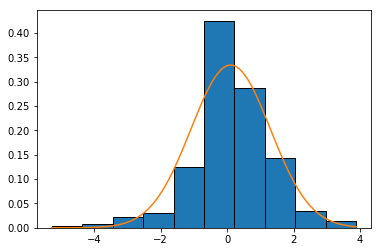

In [19]:
# 11. plot histogram of price changes with normal curve overlay
import matplotlib.mlab as mlab

plt.hist(amzn_percent_change[1:], edgecolor='black', normed=True)

# overlay normal curve
mean = float(np.mean(amzn_percent_change))
sd = float(np.std(amzn_percent_change, ddof=1))
min_chng = float(np.min(amzn_percent_change))
max_chng = float(np.max(amzn_percent_change))
a = np.linspace(min_chng, max_chng,100)
plt.plot(a,mlab.normpdf(a,mean,sd))


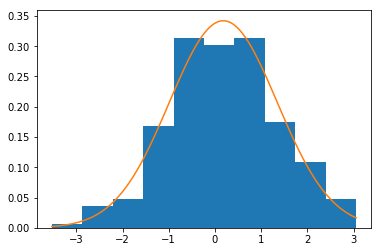

In [20]:
# 12. compare to sample drawn from a normally distributed population with same attributes as amzn price change
plt.hist(x, normed=True)

mean = float(np.mean(x))
sd = float(np.std(x))
b = np.linspace(np.min(x), np.max(x), 100)
plt.plot(b,mlab.normpdf(b, mean, sd))
plt.show()